<a href="https://colab.research.google.com/github/marquesdb/Aval3_Probabilidade/blob/master/Trabalho_Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução

O presente trabalho visa apresentar alguns conceitos e ferramentas aprendidos na disciplina de Probabilidade, através da aplicação em uma análise estatística de uma disciplina do curso de Bacharelado de Tecnologia da Informação (BTI). A disciplina analisada foi Introdução às Técnicas de Programação (ITP), uma disciplina que faz parte dos componentes obrigatórios do BTI e que é oferecida a partir do segundo semestre. 
Os dados coletados da disciplina dispoem de informações de turmas de 11 docentes diferentes e do desempenho atingido pelos respectivos discentes, nos anos de 2016 e 2017. Os resultados aqui obtidos podem servir de parâmetro para avaliar os níveis de aprendizado atingidos pelos alunos de acordo com o professor.

# 2. Desenvolvimento

Nesta seção vamos carregar/importar todos as bibliotecas necessárias para o desenvolvimento do trabalho, selecionar os links dos arquivos e colunas que serão utilizados, carregar os arquivos em formato CSV para Pandas Dataframe. Depois disso, vamos realizar a limpeza e tratamento dos dados para realizar um merge entre os dataset's. 

## 2.1 Carregamento das Bibliotecas

Para este trabalho, serão utilizadas as seguintes bibliotecas:

* Matplotlib
* Pandas
* Numpy
* Seaborn


In [0]:
# Carregando as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## 2.2 Seleção de links dos arquivos CSV e colunas que serão utilizadas



In [0]:
# Selecionando os links que serão lidos diretamente do site Dados Abertos UFRN

turmas_url = ['http://bit.ly/turmas_2016_1', 'http://bit.ly/turmas_2016_2',
              'http://bit.ly/turmas_2017__1', 'http://bit.ly/turmas_2017_2']

matricula_componentes_url = ['http://bit.ly/notas_2016_1','http://bit.ly/notas_2016_2',
                             'http://bit.ly/notas_2017_1','http://bit.ly/notas_2017_2']

docentes_url = 'http://bit.ly/docentes_2018'

codigo_disciplinas_url = "http://bit.ly/codigo_disciplinas"

turmas_colunas = ['id_turma','codigo_turma', 'id_docente_interno','id_componente_curricular', 'ano', 'periodo',
                  'descricao_horario', 'total_solicitacoes', 'capacidade_aluno', 'qtd_aulas_lancadas', 'situacao_turma']

matricula_componentes_colunas = ['id_turma', "discente", 'unidade', 'nota', 'reposicao', 'faltas_unidade', 'media_final', 'numero_total_faltas','descricao']

docentes_colunas = ["id_servidor","nome"]

## 2.3 Leitura dos arquivos CSV para Pandas DataFrame


In [0]:
turmas_2016_1 = pd.read_csv(turmas_url[0], sep = ";", usecols = turmas_colunas)
turmas_2016_2 = pd.read_csv(turmas_url[1], sep = ";", usecols = turmas_colunas)
turmas_2017_1 = pd.read_csv(turmas_url[2], sep = ";", usecols = turmas_colunas)
turmas_2017_2 = pd.read_csv(turmas_url[3], sep = ";", usecols = turmas_colunas)

matricula_2016_1 = pd.read_csv(matricula_componentes_url[0], sep = ";", usecols = matricula_componentes_colunas)
matricula_2016_2 = pd.read_csv(matricula_componentes_url[1], sep = ";", usecols = matricula_componentes_colunas)
matricula_2017_1 = pd.read_csv(matricula_componentes_url[2], sep = ";", usecols = matricula_componentes_colunas)
matricula_2017_2 = pd.read_csv(matricula_componentes_url[3], sep = ";", usecols = matricula_componentes_colunas)

docentes = pd.read_csv(docentes_url, sep = ";", usecols = docentes_colunas)

#le os códigos das disciplinas com o nome de Introdução as técnicas de programação e armazena em um pd.series
codigos_itp = pd.read_csv(codigo_disciplinas_url, sep = ";", usecols = ["id_componente", "nome"])
codigos_itp = codigos_itp.loc[codigos_itp["nome"] == "INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO", "id_componente"]


## 2.4 Limpeza e tratamento dos dados

In [0]:
#separando apenas as turmas que serão utilizadas
turmas_2016_1 = turmas_2016_1[(turmas_2016_1["id_componente_curricular"].isin(codigos_itp)) & (turmas_2016_1["situacao_turma"] != "EXCLUÍDA")]
turmas_2016_2 = turmas_2016_2[(turmas_2016_2["id_componente_curricular"].isin(codigos_itp)) & (turmas_2016_2["situacao_turma"] != "EXCLUÍDA")]
turmas_2017_1 = turmas_2017_1[(turmas_2017_1["id_componente_curricular"].isin(codigos_itp)) & (turmas_2017_1["situacao_turma"] != "EXCLUÍDA")]
turmas_2017_2 = turmas_2017_2[(turmas_2017_2["id_componente_curricular"].isin(codigos_itp)) & (turmas_2017_2["situacao_turma"] != "EXCLUÍDA")]

#separando as notas
matricula_2016_1 = matricula_2016_1[matricula_2016_1["id_turma"].isin(turmas_2016_1["id_turma"])]
matricula_2016_2 = matricula_2016_2[matricula_2016_2["id_turma"].isin(turmas_2016_2["id_turma"])]
matricula_2017_1 = matricula_2017_1[matricula_2017_1["id_turma"].isin(turmas_2017_1["id_turma"])]
matricula_2017_2 = matricula_2017_2[matricula_2017_2["id_turma"].isin(turmas_2017_2["id_turma"])]

#concatena todas as matriculas/notas em um unico dataframe
turmas = pd.concat([turmas_2016_1, turmas_2016_2, turmas_2017_1, turmas_2017_2], ignore_index=True)

#concatena todas as matriculas/notas em um unico dataframe
notas = pd.concat([matricula_2016_1, matricula_2016_2, matricula_2017_1, matricula_2017_2], 
                  ignore_index = True).drop_duplicates(subset = ["id_turma", "discente", "unidade"], keep = "first")

#apenas os professores que deram a disciplina de itp
docentes = docentes[docentes["id_servidor"].isin(turmas["id_docente_interno"])].rename(columns = {'id_servidor':'id_docente_interno'})

## 2.5 Merge entre dataframes

In [0]:
#merge entre turmas e docentes
turmas_docentes = pd.merge(turmas, docentes, on = "id_docente_interno", how = "left")
turmas_docentes2 = turmas_docentes[turmas_docentes.duplicated(subset = "id_turma")].rename(columns = {"id_docente_interno":"id_docente_interno2",
                                                                "nome":"nome2"})
turmas_docentes = turmas_docentes.drop_duplicates(subset = "id_turma")
turmas_docentes = pd.merge(turmas_docentes, turmas_docentes2, on = ["id_turma", "codigo_turma", 
        "id_componente_curricular", "ano", "periodo", "descricao_horario", "total_solicitacoes", "capacidade_aluno", 
                                                                    "qtd_aulas_lancadas", "situacao_turma"], how = "left")
dados = pd.merge(notas, turmas_docentes, on = "id_turma", how = "left")

# 3. Análise dos Dados

Nesta seção vamos destrinchar nossa base de dados e descobrir padrões ou fazer análises que sejam interessantes, utilizando-se de gráficos e tabelas de frequência. Devido ao grande número de docentes, algumas análises serão feitas pontualmente com alguns professores. Os mesmos poderão ser replicados com os demais professores para análises específicas.

## 3.1 Distribuição de Frequência

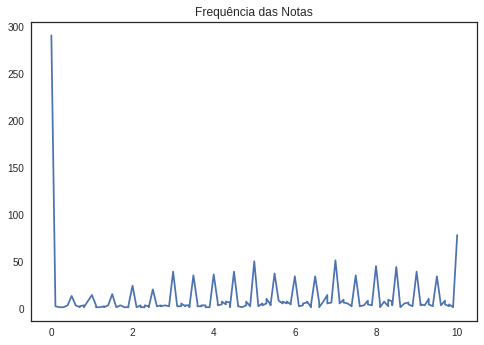

In [0]:
nota_asc = dados[dados.descricao.isin(['APROVADO', 'APROVADO POR NOTA', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS','REPROVADO POR NOTA E FALTA'
                                                   , 'REPROVADO POR NOTA'])]
nota_asc = nota_asc.loc[nota_asc["nota"].notnull(), "nota"]
nota_asc = nota_asc.value_counts().sort_index(ascending = True)

plt.plot(nota_asc)
plt.title("Frequência das Notas")
plt.show()

In [0]:
# Cálculo de percentis das notas das turmas
percentis = dados[dados.descricao.isin(['APROVADO', 'APROVADO POR NOTA', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS','REPROVADO POR NOTA E FALTA'
                                                   , 'REPROVADO POR NOTA'])]
percentis = percentis.loc[percentis["nota"].notnull()]
percentis['nota'].describe().iloc[3:]


min     0.0
25%     2.0
50%     5.3
75%     7.7
max    10.0
Name: nota, dtype: float64

In [0]:
# Tabela de frequência
tabela = dados[dados.descricao.isin(['APROVADO', 'APROVADO POR NOTA', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS','REPROVADO POR NOTA E FALTA'
                                                   , 'REPROVADO POR NOTA'])]
tabela = tabela.loc[tabela["nota"].notnull()]
tabela['nota'].value_counts(bins = 10).sort_index()

(-0.011, 1.0]    335
(1.0, 2.0]        63
(2.0, 3.0]        87
(3.0, 4.0]       107
(4.0, 5.0]       149
(5.0, 6.0]       156
(6.0, 7.0]       161
(7.0, 8.0]       152
(8.0, 9.0]       149
(9.0, 10.0]      168
Name: nota, dtype: int64

## 3.2 Visualização de Distribuição de Frequência

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


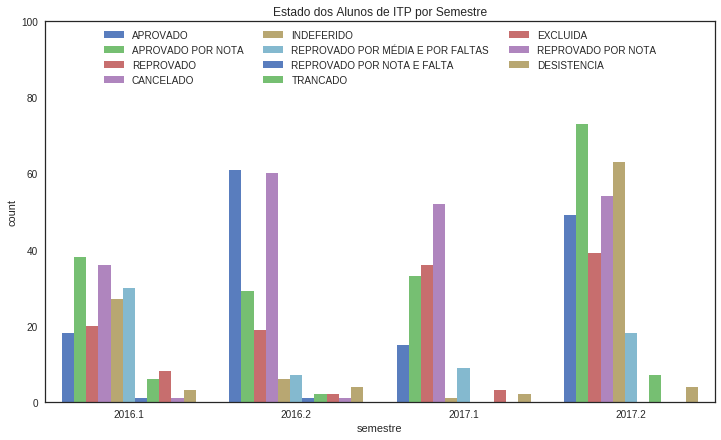

In [0]:
# Visualização por gráfico de barra vertical
fig, ax = plt.subplots(figsize = (12, 7))
new_data = pd.DataFrame(columns = ["descricao", "periodo", "ano"])
for semestre in ["2016.1", "2016.2", "2017.1", "2017.2"]:
    aux = dados[(dados["ano"] == int(semestre.split(".")[0])) & (dados["periodo"] == int(semestre.split(".")[1]))]
    aux = aux[~aux.duplicated(subset = ["id_turma", "discente"])]
    new_data = new_data.append((aux[["descricao", "periodo", "ano"]]))
new_data["ano"] = new_data["ano"].astype(str)  
new_data["periodo"] = new_data["periodo"].astype(str)
new_data["semestre"] = new_data["ano"] + "." +new_data["periodo"]

colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#ffff00", "#ff00ff"]
sns.countplot(x = "semestre", hue = "descricao", data = new_data, ax = ax, palette = "muted")
ax.legend(ncol = 3, loc = "upper center", frameon = False)
ax.set_ylim(0, 100)
plt.title("Estado dos Alunos de ITP por Semestre")
plt.show()

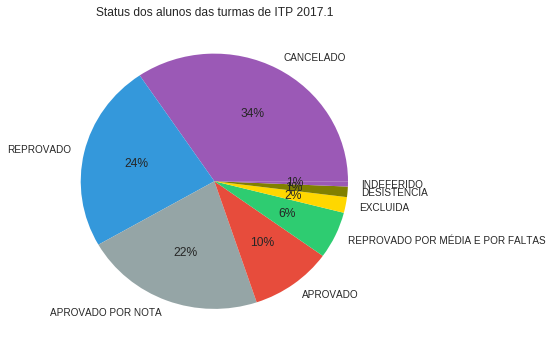

In [0]:
# Visualização por gráfico de pizza
fig, ax = plt.subplots(figsize = (6, 6))
descricao = dados[(dados["ano"] == 2017) & (dados["periodo"] == 1)].drop_duplicates(subset = ["id_turma", "discente"])
descricao = descricao["descricao"].value_counts(ascending = False)
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#2ecc71", "#FFD700", "#808000"]
descricao.plot(kind = "pie", figsize = (5,5), autopct = '%.0f%%',title = "Status dos alunos das turmas de ITP 2017.1", colors = colors)
plt.ylabel('')
plt.tight_layout()
plt.show()

## 3.3 Comparando distribuições de frequência

In [0]:
# Segmentação do status dos alunos
isabel = dados[dados["nome"] == "ISABEL DILLMANN NUNES"]
andre_s = dados[dados["nome"] == "ANDRE LUIZ DA SILVA SOLINO"]
joao = dados[dados["nome"] == "JOAO CARLOS XAVIER JUNIOR"]
andre_m = dados[dados["nome"] == "ANDRE MAURICIO CUNHA CAMPOS"]
isaac = dados[dados["nome"] == "ISAAC FRANCO FERNANDES"]
adja = dados[dados["nome"] == "ADJA FERREIRA DE ANDRADE"]
silvio = dados[dados["nome"] == "SILVIO COSTA SAMPAIO"]
rafael = dados[dados["nome"] == "RAFAEL BESERRA GOMES"]
marjory = dados[dados["nome"] == "MARJORY CRISTIANY DA COSTA ABREU"]
andre_b = dados[dados["nome"] == "ANDRE LUIZ DE SOUZA BRITO"]
ana = dados[dados["nome"] == "ANNA GISELLE CAMARA DANTAS RIBEIRO RODRIGUES"]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


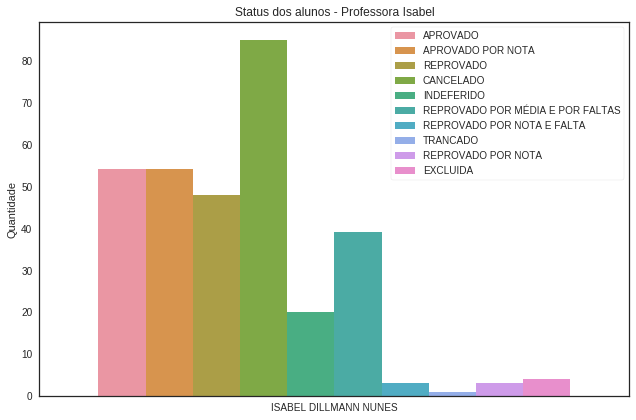

In [0]:
# Visualização do status dos alunos para a professora Isabel
fig, ax = plt.subplots(figsize = (9, 6))
sns.countplot(x = 'nome', hue = 'descricao', data = isabel)
plt.ylabel('Quantidade')
plt.xlabel('')
plt.legend(ncol = 1, frameon = True, loc = "best")
plt.title("Status dos alunos - Professora Isabel")
plt.tight_layout()

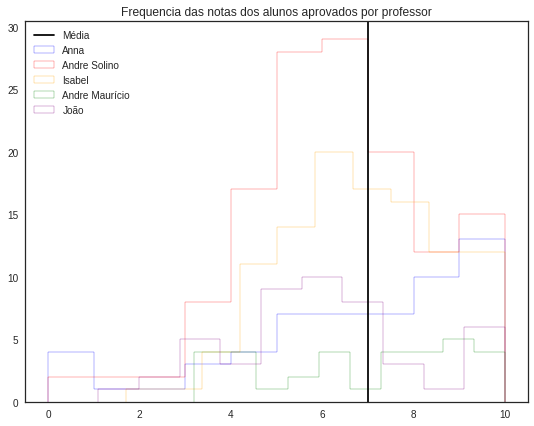

In [0]:
# Comparação dos aprovados em relação a nota e ao professor (alguns)
sns.set_style("white")
fig, ax = plt.subplots(figsize = (9, 7))
ax = ana[(ana.descricao == "APROVADO") | (ana.descricao == "APROVADO POR NOTA")]['nota'].plot.hist(histtype = 'step'
                                                            , label = 'Anna', legend = True,color = "blue")
ax = andre_s[(andre_s.descricao == "APROVADO") |(andre_s.descricao == "APROVADO POR NOTA")]['nota'].plot.hist(histtype = 'step'
                                                                , label = 'Andre Solino', legend = True,color = "red")
ax = isabel[(isabel.descricao == "APROVADO") | (isabel.descricao == "APROVADO POR NOTA")]['nota'].plot.hist(histtype = 'step'
                                                                , label = 'Isabel', legend = True,color = "orange")
ax = andre_m[(andre_m.descricao == "APROVADO") | (andre_m.descricao == "APROVADO POR NOTA")]['nota'].plot.hist(histtype = 'step'
                                                                , label = 'Andre Maurício', legend = True,color = "green")
ax = joao[(joao.descricao == "APROVADO") |(joao.descricao == "APROVADO POR NOTA")]['nota'].plot.hist(histtype = 'step'
                                                                                            , label = 'João', legend = True,color = "purple")
plt.axvline(x=7,label = 'Média', color = "black")
plt.legend()
plt.ylabel('')
plt.legend(loc = "upper left")
plt.title("Frequencia das notas dos alunos aprovados por professor")
plt.show()

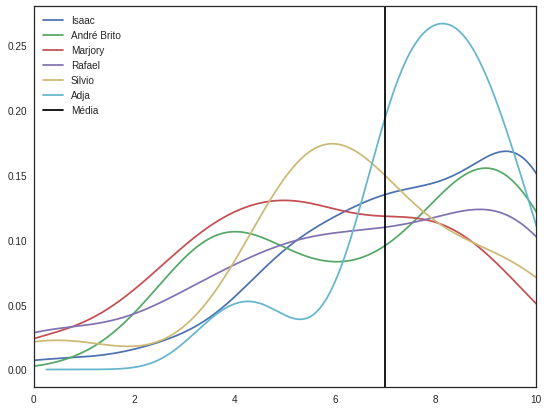

In [0]:
fig, ax = plt.subplots(figsize = (9, 7))
ax = isaac[(isaac.descricao == "APROVADO") | (isaac.descricao == "APROVADO POR NOTA")]['nota'].plot.kde(label = 'Isaac', legend = True)
ax = andre_b[(andre_b.descricao == "APROVADO") | (andre_b.descricao == "APROVADO POR NOTA")]['nota'].plot.kde(label = 'André Brito', legend = True)
ax = marjory[(marjory.descricao == "APROVADO") | (marjory.descricao == "APROVADO POR NOTA")]['nota'].plot.kde(label = 'Marjory', legend = True)
ax = rafael[(rafael.descricao == "APROVADO") | (rafael.descricao == "APROVADO POR NOTA")]['nota'].plot.kde(label = 'Rafael', legend = True)
ax = silvio[(silvio.descricao == "APROVADO") | (silvio.descricao == "APROVADO POR NOTA")]['nota'].plot.kde(label = 'Silvio', legend = True)
ax = adja[(adja.descricao == "APROVADO") | (adja.descricao == "APROVADO POR NOTA")]['nota'].plot.kde(label = 'Adja', legend = True)

plt.axvline(x = 7,label = 'Média', color = "black")
plt.legend(loc = "upper left")
plt.xlim(0, 10)
plt.ylabel('')
plt.show()

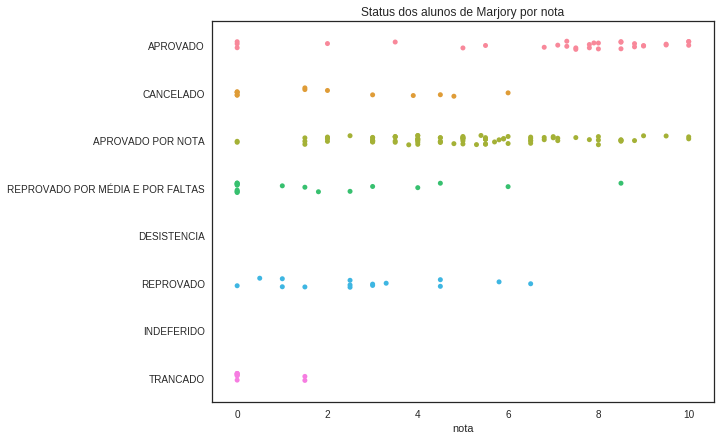

In [0]:
fig, ax = plt.subplots(figsize = (9, 7))
ax = sns.stripplot(x = 'nota', y = 'descricao', data = marjory, jitter = True)
plt.title("Status dos alunos de Marjory por nota")
plt.ylabel("")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


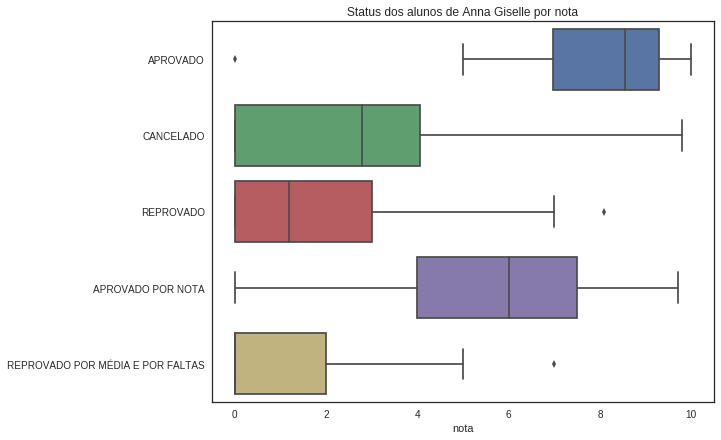

In [0]:
fig, ax = plt.subplots(figsize = (9, 7))
ax = sns.boxplot(x = 'nota', y = 'descricao', data = ana)
plt.title("Status dos alunos de Anna Giselle por nota")
plt.ylabel("")
plt.show()

## 3.4 Média X Mediana

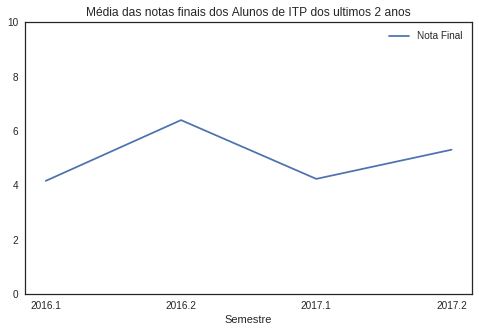

In [0]:
#media final dos alunos dos ultimos 2 anos
fig, ax = plt.subplots(figsize = (8, 5))
anos_medias = {"2016.1":0, "2016.2":0, "2017.1":0, "2017.2":0}
anos_dados = dados.loc[~dados.duplicated(subset = ["id_turma", "discente"]), ["ano", "periodo", "media_final", "descricao"]]
anos_dados = anos_dados[anos_dados.descricao.isin(['APROVADO', 'APROVADO POR NOTA', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS','REPROVADO POR NOTA E FALTA'
                                                   , 'REPROVADO POR NOTA'])]                               
for semestre in anos_medias:
  anos_medias[semestre] = np.mean(anos_dados.loc[(anos_dados["ano"] == int(semestre.split(".")[0])) & (anos_dados["periodo"] == int(semestre.split(".")[1])), "media_final"])

plt.plot(anos_medias.keys(), anos_medias.values(), label = "Nota Final")
plt.xlabel("Semestre")
plt.ylim(0, 10)
plt.title("Média das notas finais dos Alunos de ITP dos ultimos 2 anos")
plt.legend(loc = "best")
plt.show()

In [0]:
isabel = isabel.drop_duplicates(subset = ["id_turma", "discente"])
andre_s = andre_s.drop_duplicates(subset = ["id_turma", "discente"])
joao = joao.drop_duplicates(subset = ["id_turma", "discente"])
andre_m = andre_m.drop_duplicates(subset = ["id_turma", "discente"])
isaac = isaac.drop_duplicates(subset = ["id_turma", "discente"])
adja = adja.drop_duplicates(subset = ["id_turma", "discente"])
silvio = silvio.drop_duplicates(subset = ["id_turma", "discente"])
rafael = rafael.drop_duplicates(subset = ["id_turma", "discente"])
marjory = marjory.drop_duplicates(subset = ["id_turma", "discente"])
andre_b = andre_b.drop_duplicates(subset = ["id_turma", "discente"])
ana = ana.drop_duplicates(subset = ["id_turma", "discente"])

# Media das notas finais dos alunos por professor
isabel_m = isabel["media_final"].mean()
andre_s_m = andre_s["media_final"].mean()
joao_m = joao["media_final"].mean()
andre_m_m = andre_m["media_final"].mean()
isaac_m = isaac["media_final"].mean()
adja_m = adja["media_final"].mean()
silvio_m = silvio["media_final"].mean()
rafael_m = rafael["media_final"].mean()
marjory_m = marjory["media_final"].mean()
andre_b_m = andre_b["media_final"].mean()
ana_m = ana["media_final"].mean()


In [0]:
# Mediana das notas finais dos alunos por professor
isabel_md = isabel["media_final"].median()
andre_s_md = andre_s["media_final"].median()
joao_md = joao["media_final"].median()
andre_m_md = andre_m["media_final"].median()
isaac_md = isaac["media_final"].median()
adja_md = adja["media_final"].median()
silvio_md = silvio["media_final"].median()
rafael_md = rafael["media_final"].median()
marjory_md = marjory["media_final"].median()
andre_b_md = andre_b["media_final"].median()
ana_md = ana["media_final"].median()

In [0]:
#Diferença entre a Média e Mediana

print(isabel_m-isabel_md)
print(andre_s_m-andre_s_md)
print(joao_m-joao_md)
print(andre_m_m-andre_m_md)
print(isaac_m-isaac_md)
print(adja_m-adja_md)
print(silvio_m-silvio_md)
print(rafael_m-rafael_md)
print(marjory_m-marjory_md)
print(andre_b_m-andre_b_md)
print(ana_m-ana_md)

0.5164705882352938
-0.8394736842105264
1.386842105263158
0.2181818181818178
-0.27368421052631575
-0.848780487804877
0.8500000000000001
1.115873015873016
-0.6732142857142867
-0.24878048780487738
-0.6000000000000014


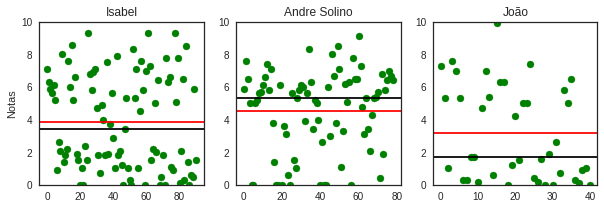

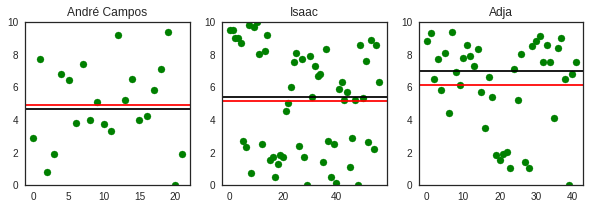

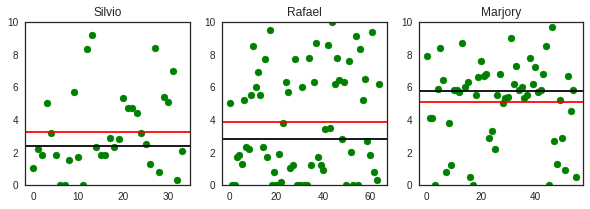

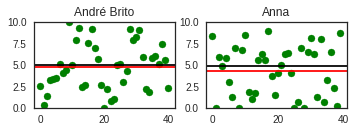

In [0]:
# Relação entre todas as notas finais dos alunos, a média e a mediana entre elas para cada turma de Professores
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(10,3))

ax1.scatter(range(0,len(isabel)),isabel["media_final"],color = "green")
ax1.axhline(y = isabel_m,label = 'Média', color = "red")
ax1.axhline(y = isabel_md,label = 'Mediana', color = "black")
ax1.set_title("Isabel")
ax1.set_ylabel("Notas")
ax1.set_ylim(0, 10)
ax2.scatter(range(0,len(andre_s)),andre_s["media_final"],color = "green")
ax2.axhline(y = andre_s_m,label = 'Média', color = "red")
ax2.axhline(y = andre_s_md,label = 'Mediana', color = "black")
ax2.set_title("Andre Solino")
ax2.set_ylim(0, 10)
ax3.scatter(range(0,len(joao)),joao["media_final"],color = "green")
ax3.axhline(y = joao_m,label = 'Média', color = "red")
ax3.axhline(y = joao_md,label = 'Mediana', color = "black")
ax3.set_title("João")
ax3.set_ylim(0, 10)
fig,(ax4, ax5, ax6)= plt.subplots(nrows = 1, ncols = 3, figsize=(10,3))

ax4.scatter(range(0,len(andre_m)),andre_m["media_final"],color = "green")
ax4.axhline(y = andre_m_m,label = 'Média', color = "red")
ax4.axhline(y = andre_m_md,label = 'Mediana', color = "black")
ax4.set_title("André Campos")
ax4.set_ylim(0, 10)
ax5.scatter(range(0,len(isaac)),isaac["media_final"],color = "green")
ax5.axhline(y = isaac_m,label = 'Média', color = "red")
ax5.axhline(y = isaac_md,label = 'Mediana', color = "black")
ax5.set_title("Isaac")
ax5.set_ylim(0, 10)
ax6.scatter(range(0,len(adja)),adja["media_final"],color = "green")
ax6.axhline(y = adja_m,label = 'Média', color = "red")
ax6.axhline(y = adja_md,label = 'Mediana', color = "black")
ax6.set_title("Adja")
ax6.set_ylim(0, 10)
fig,(ax7, ax8, ax9)= plt.subplots(nrows = 1, ncols = 3, figsize=(10,3))

ax7.scatter(range(0,len(silvio)),silvio["media_final"],color = "green")
ax7.axhline(y = silvio_m,label = 'Média', color = "red")
ax7.axhline(y = silvio_md,label = 'Mediana', color = "black")
ax7.set_title("Silvio")
ax7.set_ylim(0, 10)
ax8.scatter(range(0,len(rafael)),rafael["media_final"],color = "green")
ax8.axhline(y = rafael_m,label = 'Média', color = "red")
ax8.axhline(y = rafael_md,label = 'Mediana', color = "black")
ax8.set_title("Rafael")
ax8.set_ylim(0, 10)
ax9.scatter(range(0,len(marjory)),marjory["media_final"],color = "green")
ax9.axhline(y = marjory_m,label = 'Média', color = "red")
ax9.axhline(y = marjory_md,label = 'Mediana', color = "black")
ax9.set_title("Marjory")
ax9.set_ylim(0, 10)
fig,(ax10, ax11) = plt.subplots(nrows = 1, ncols = 2, figsize=(5,2))

ax10.scatter(range(0,len(andre_b)),andre_b["media_final"],color = "green")
ax10.axhline(y = andre_b_m,label = 'Média', color = "red")
ax10.axhline(y = andre_b_md,label = 'Mediana', color = "black")
ax10.set_title("André Brito")
ax10.set_ylim(0, 10)

ax11.scatter(range(0,len(ana)),ana["media_final"],color = "green")
ax11.axhline(y = ana_m,label = 'Média', color = "red")
ax11.axhline(y = ana_md,label = 'Mediana', color = "black")
ax11.set_title("Anna")
ax11.set_ylim(0, 10)

plt.tight_layout()

## 3.5 Mediana

In [0]:
# Mediana da média final de cada turma

matricula_2016_1[np.isnan(matricula_2016_1["media_final"])] = 0
medias1 = matricula_2016_1["media_final"].sort_values()
x1 = (len(medias1))//2
median1 = (medias1.iloc[x1] + medias1.iloc[x1+1])/2
print(median1,matricula_2016_1["media_final"].median())


matricula_2016_2[np.isnan(matricula_2016_2["media_final"])] = 0
medias2 = matricula_2016_2["media_final"].sort_values()
x2 = (len(medias2))//2
median2 = (medias2.iloc[x2] + medias2.iloc[x2+1])/2
print(median2,matricula_2016_2["media_final"].median())


matricula_2017_1[np.isnan(matricula_2017_1["media_final"])] = 0
medias3 = matricula_2017_1["media_final"].sort_values()
x3 = (len(medias3))//2
median3 = (medias3.iloc[x3] + medias3.iloc[x3+1])/2
print(median3,matricula_2017_1["media_final"].median())


matricula_2017_2[np.isnan(matricula_2017_2["media_final"])] = 0
medias4 = matricula_2017_2["media_final"].sort_values()
x4 = (len(medias4))//2
median4 = (medias4.iloc[x4] + medias4.iloc[x4+1])/2
print(median4,matricula_2017_2["media_final"].median())



1.9 1.85
5.5 5.5
2.7 2.6
4.1 4.1


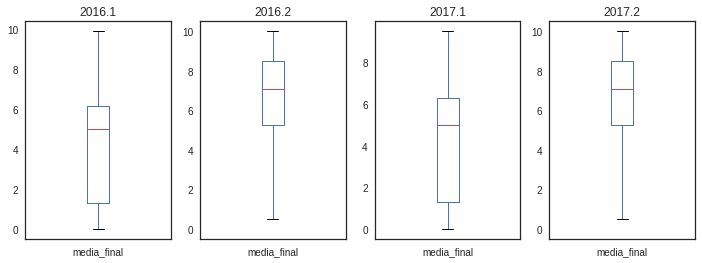

In [0]:
# Visualização da mediana através do gráfico de caixa
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
new_dados = dados.drop_duplicates(subset = ["id_turma", "discente"])
new_dados = new_dados[new_dados.descricao.isin(['APROVADO', 'APROVADO POR NOTA', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS','REPROVADO POR NOTA E FALTA'
                                                   , 'REPROVADO POR NOTA'])]
new_dados.loc[(new_dados["ano"] == 2016) & (new_dados["periodo"] == 1), "media_final"].plot(kind='box',ax=axes[0])
new_dados.loc[(new_dados["ano"] == 2016) & (new_dados["periodo"] == 2), "media_final"].plot(kind='box',ax=axes[1])
new_dados.loc[(new_dados["ano"] == 2017) & (new_dados["periodo"] == 1), "media_final"].plot(kind='box',ax=axes[2])
new_dados.loc[(new_dados["ano"] == 2016) & (new_dados["periodo"] == 2), "media_final"].plot(kind='box',ax=axes[3])
axes[0].set_title("2016.1")
axes[1].set_title("2016.2")
axes[2].set_title("2017.1")
axes[3].set_title("2017.2")

plt.show()

## 3.6 Moda

In [0]:
# Selecionando a Moda
def mode(array):
    counts = {}
    
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    moda = max(counts, key = counts.get)
    
    return (moda,counts)
  
x = mode(matricula_2017_2["descricao"])

mode = x[0]
value_counts = x[1]

print(mode)
print(value_counts)

APROVADO POR NOTA
{'CANCELADO': 129, 'APROVADO POR NOTA': 261, 'APROVADO': 177, 'REPROVADO': 147, 0: 162, 'REPROVADO POR MÉDIA E POR FALTAS': 54, 'TRANCADO': 9}


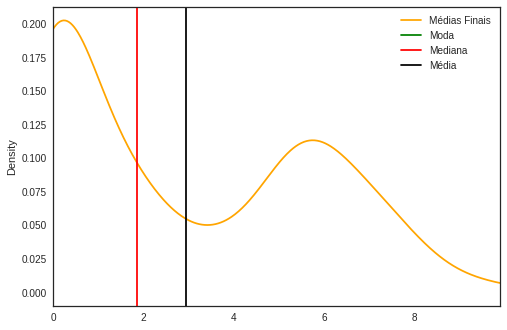

In [0]:
medias1.plot.kde(xlim = (medias1.min(),medias1.max()), label = 'Médias Finais',color = 'orange')
plt.axvline(medias1.mode()[0], label = 'Moda', color = 'green')
plt.axvline(medias1.median(), label = 'Mediana', color = 'red')
plt.axvline(medias1.mean(), label = 'Média', color = 'black')
plt.legend()
plt.show()

## 3.7 Medidas de Variabilidade

In [0]:
# Retorna o intervalo da lista
def rng(array):
  rng = max(array)-min(array)
  return rng

keys = [2016, 2017]

ranges = []

for year in keys:
  df_filtered = dados[dados["ano"] == year]
  calc = rng(dados["nota"])
  ranges.append(calc)
  

range_by_year = dict(zip(keys,ranges))

print(range_by_year)

{2016: 10.0, 2017: 10.0}


# **4. Conclusão**

A partir das ferramentas disponíveis no Python, foi possível realizar avaliações estatísticas das turmas de cada professor da disciplina de ITP, bem como uma avaliação geral da disciplina por semestre. 

Através dos gráficos de barras, pizza, diagrama de caixas é possível obter um panorama das médias, medianas, modas referentes aos desempenhos dos alunos. Desta forma, permite-se reconhecer padrões peculiares da evolução do aprendizado de cada turma. Assim, é possível elaborar projeções da situação de cada turma, baseado em seus resultados anteriores. 

Do mesmo modo, pode ser uma forma de contribuir significativamente na avaliação de quesitos importantes, tais como eficiência dos docentes, índices de reprovação, e demais aspectos relevantes no meio acadêmico, para traçar estratégias na promoção de melhorias na qualidade do ensino.